# <center>Linear Regression</center>

## Nhắc lại linear regression
là một mô hình dự đoán giá trị từ một hoặc nhiều biến số.  
$$ y = \beta_0 + \beta_1x_1 + .. +\beta_nx_n + \epsilon$$
- $ \beta_0$: intercept
- $ \beta_1..\beta_n$: coefficients
- $ x_0, x_1,..,x_n$: variables, features, regressors; $x_0 = 1$
- $\epsilon$ là bias của model, không can thiệp được

Các intercept và coef được tìm ra bằng giảm thiểu tối đa sum of square error.
$$ RSS = \sum(y - y_{pred})^2 $$
Phương pháp này gọi là Ordinary least square error.

### Trường hợp biết trước $\sigma^2$ của coef
Trong *Bayes*, chúng ta giả định $\epsilon$ phân phối Normal, nên các $\beta$ cũng phân phối Normal.  
Ta dùng Jeffreys prior là $f(\beta) \propto 1$  

Nếu ta chỉ có 1 variable, thì:
$$ \beta|y \sim N\left(\frac{\sum_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^n (x_i-\overline{x})^2}, \frac{\sigma^2}{\sum_{i=1}^n (x_i-\overline{x})} \right)$$

Nếu ta có nhiều variables, thì dùng matrix:
$$ \beta|y \sim N( (X^t X)^{-1}X^ty, (X^t X)^{-1}\sigma^2) $$ 

### Trường hợp không biết $\sigma^2$ của coef
Ta sử dụng Jeffreys prior là $ f(\beta, \sigma^2) \propto 1/\sigma^2 $  với  
$\sigma^2 \sim$ Inverse Gamma $ (\frac{n-k-1}{2}, \frac{n-k-1}{2}s^2) $

Khi đó:  
$ B|y \sim t$ (dof, loc, scale)
- dof = n-k-1
- loc = $(X^t X)^{-1}X^ty$
- scale = $(X^t X)^{-1}s^2$, $s^2 = \sum_{i=1}^n (y_i-\overline{y})/(n-k-1)$
- n là số dòng data, k là số cột

Trong trường hợp 1 variable, a có predictive distribution là t(dof, loc, scale) với giá trị mới là $x^*$:
- dof = n-k-1 = n-2
- loc = $\frac{\sum_{i=1}^n (x_i-\overline{x})(y_i-\overline{y})}{\sum_{i=1}^n (x_i-\overline{x})^2}$
- scale = RSE $\sqrt{1 + \frac{1}{n} + \frac{(x^* - \overline{x})^2}{(n-1)s^2_x}}$, RSE = $\sqrt{s^2} $
- $s^2$ là mean square error, RSE là residual standard error 

---
Data này được upload http://www.stat.ufl.edu/~winner/data/pgalpga2008.dat  
bao gồm dữ liệu của những người chơi golf ở United States LPGA and PGA tours.  

*LPGA*: The Ladies Professional Golf Association is an American organization for female professional golfers. 

- Distance là khoảng cách trung bình của golf bay khi đánh, đơn vị là yard.  
- Accuracy là tỉ lệ golf rơi vào fairway, tương đương với độ chính xác. Fairway là nơi lý tưởng để golf rơi vào.  
- Gender: 
    - 1 -> nữ (LPGA tours);  
    - 2 -> nam (PGA tours)

In [55]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [20]:
df = pd.read_csv("http://www.stat.ufl.edu/~winner/data/pgalpga2008.dat",
                 header=None,
                 delimiter="\s+",
                 names=["distance", "accuracy", "gender"])

In [24]:
df.head(), df.tail()

(   distance  accuracy  gender
 0     243.2      67.0       1
 1     254.5      70.1       1
 2     253.1      59.3       1
 3     228.1      70.4       1
 4     240.8      69.5       1,      distance  accuracy  gender
 349     297.8      59.5       2
 350     286.0      62.6       2
 351     285.3      66.2       2
 352     286.9      63.4       2
 353     275.1      73.7       2)

In [22]:
df.describe()

,distance,accuracy,gender
count,354.000000,354.000000,354.000000
mean,269.511582,65.239266,1.556497
std,22.196027,5.973796,0.497501
min,224.800000,49.000000,1.000000
25%,247.675000,61.125000,1.000000
50%,276.450000,65.600000,2.000000
75%,287.700000,69.475000,2.000000
max,315.100000,80.400000,2.000000


In [26]:
#LPGA
df1 = df[df['gender']==1]
df1.head()

,distance,accuracy,gender
0,243.2,67.0,1
1,254.5,70.1,1
2,253.1,59.3,1
3,228.1,70.4,1
4,240.8,69.5,1


In [27]:
#PGA
df2 = df[df['gender']==2]
df2.head()

,distance,accuracy,gender
157,290.3,59.5,2
158,302.1,54.7,2
159,287.1,62.4,2
160,282.7,65.4,2
161,299.1,52.8,2


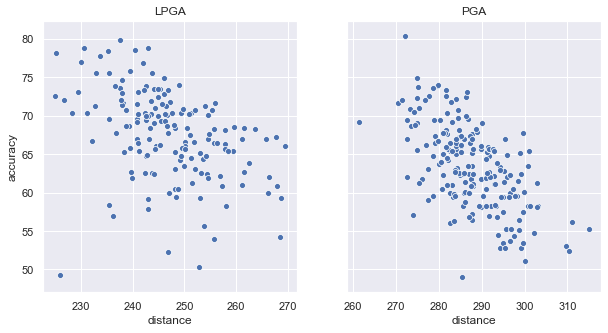

In [86]:
# scatterplot 2 data
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
sns.scatterplot(df1['distance'], df1['accuracy'],ax=ax[0])
sns.scatterplot(df2['distance'], df2['accuracy'],ax=ax[1])

ax[0].set_title('LPGA')
ax[1].set_title('PGA');

=> Nhìn đồ thị ta thấy khoảng cách golf bay trung bình tương quan nghịch với độ chính xác (negatively correlated). Ai đánh xa hơn thì kém chính xác.

**Dùng linear regression để làm model dự đoán**  

In [84]:
#FPGA
model1 = sm.OLS(df1['accuracy'], sm.add_constant(df1['distance'])).fit()
model1.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,130.8933,10.928,11.978,0.000,109.307,152.480
distance,-0.2565,0.044,-5.797,0.000,-0.344,-0.169


In [81]:
#PGA
model2 = sm.OLS(df2['accuracy'], sm.add_constant(df2['distance'])).fit()
model2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,174.9255,10.448,16.743,0.000,154.320,195.530
distance,-0.3879,0.036,-10.683,0.000,-0.459,-0.316


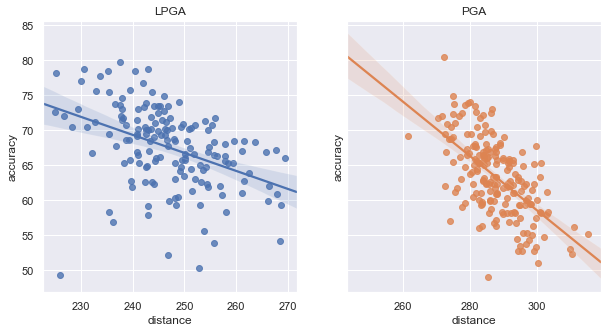

In [91]:
# Vẽ regression line và confidence_interval
fig, ax = plt.subplots(1,2, figsize=(10,5), sharey=True)
sns.regplot(df1['distance'], df1['accuracy'],ax=ax[0])
sns.regplot(df2['distance'], df2['accuracy'],ax=ax[1])

ax[0].set_title('LPGA')
ax[1].set_title('PGA');

In [82]:
# predict model1 with distance =260
model1.get_prediction([1,260]).summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,64.205732,0.718569,62.78628,65.625184,53.745277,74.666188


**Với distance=260, ta dự đoán accuracy=64.2 với khoảng tin cậy 95% dự đoán (53.7, 74.5).**  
Nếu ta sampling nhiều lần với distance=260 thì trung bình của data sẽ là 64.2 với khoảng tin cậy 95% (62.8, 65.6)